## Introduction to Collections

ArcGIS StoryMaps offers a capability that allows you to assemble collections, which are sets of ArcGIS StoryMaps items bundled for sharing. Collections can include your own stories as well as stories authored by others. Other items such as ArcGIS apps, media, and files can also be added to a collection as supporting content.

You can use collections in a variety of ways, such as telling a longer story in installments or chapters; gathering stories, apps, and items that share a common theme; or creating a portfolio of your work.

In [1]:
from arcgis.gis import GIS
from arcgis.apps.storymap import Collection, Themes

In [2]:
gis = GIS(profile='your_online_profile')

We start by creating a `Collection` and adding content to it.

In [3]:
my_collection = Collection()

### Add content to the Collection

#### 1. StoryMap

We start by adding a StoryMap item.

<Item title:"Nature Themed Story" type:StoryMap owner:MMajumdar_geosaurus>
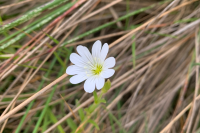

In [4]:
storymap_item = gis.content.get('7860d45d35f6455193576933206d8352')
storymap_item

In [5]:
my_collection.add(storymap_item)

#### 2. Briefing

In [6]:
briefing_item = gis.content.get('af0ff7bd06d046b3b7b3344c78eecb4f')
briefing_item

<Item title:"Nature themed Briefing slides" type:StoryMap owner:MMajumdar_geosaurus>

In [7]:
my_collection.add(briefing_item)

#### 3. Map 

<Item title:"Nature WebMap" type:Web Map owner:MMajumdar_geosaurus>
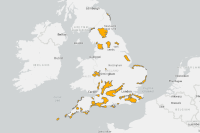

In [8]:
map_item = gis.content.get('7f39672ef7f6469db7b2bbd383349fc1')
map_item

In [9]:
my_collection.add(map_item)

#### 4. Web Experience app

<Item title:"Capitals and time zones" type:Web Experience owner:MMajumdar_geosaurus>
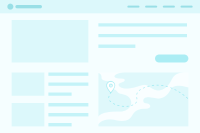

In [11]:
my_experience = gis.content.get('717f06e4e65c432a866e12c86a7505f3')
my_experience

In [12]:
my_collection.add(my_experience)

### Save the collection

While we are demonstrating the process to programmatically [`save()`](https://developers.arcgis.com/python/latest/api-reference/arcgis.apps.storymap.html#arcgis.apps.storymap.collection.Collection.save) the Collection below, it is encouraged to view and verify the Collection in the UI before you publish it. 

In [17]:
my_collection.save(title = "Nature Collection", tags = "Python", access = "private")

<Item title:"Nature Collection" type:StoryMap owner:MMajumdar_geosaurus>

![collection](https://github.com/user-attachments/assets/8335c094-fb48-4118-ac32-98c1b0316e18)

### View content of Collection

You can view the contents of a `Collection` as a list and a table using the `content` and `content_info` properties respectively. 

In [14]:
my_collection.content

[Cover(),
 CollectionNavigation(),
 <Item title:"Nature Themed Story" type:StoryMap owner:MMajumdar_geosaurus>,
 <Item title:"Nature themed Briefing slides" type:StoryMap owner:MMajumdar_geosaurus>,
 <Item title:"Nature WebMap" type:Web Map owner:MMajumdar_geosaurus>,
 <Item title:"Capitals and time zones" type:Web Experience owner:MMajumdar_geosaurus>]

In [15]:
my_collection.content_info

,Type,Instance,Visibility,Location
0,StoryMap,"{'id': '7860d45d35f6455193576933206d8352', 'ow...",True,[]
1,StoryMap,"{'id': 'af0ff7bd06d046b3b7b3344c78eecb4f', 'ow...",True,[]
2,Web Map,"{'id': '7f39672ef7f6469db7b2bbd383349fc1', 'ow...",True,[]
3,Web Experience,"{'id': '717f06e4e65c432a866e12c86a7505f3', 'ow...",True,[]


You can also update the visibility of a particular content item in the Collection using the [`update_content_info()`](https://developers.arcgis.com/python/latest/api-reference/arcgis.apps.storymap.html#arcgis.apps.storymap.collection.Collection.update_content_info) method.

E.g., the `Web Experience` item is still work in progress and we can hide it. 

In [18]:
my_collection.update_content_info(index = 3, visible = False)

,Type,Instance,Visibility,Location
0,StoryMap,"{'id': '7860d45d35f6455193576933206d8352', 'ow...",True,[]
1,StoryMap,"{'id': 'af0ff7bd06d046b3b7b3344c78eecb4f', 'ow...",True,[]
2,Web Map,"{'id': '7f39672ef7f6469db7b2bbd383349fc1', 'ow...",True,[]
3,Web Experience,"{'id': '717f06e4e65c432a866e12c86a7505f3', 'ow...",False,[]


<Item title:"Nature Collection" type:StoryMap owner:MMajumdar_geosaurus>
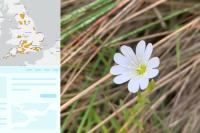

In [19]:
my_collection.save()

We now see in the Edit mode that the `Web Experience` app is hidden.

![visible](https://github.com/user-attachments/assets/7ae1d7af-3086-4f1d-b277-6de06c6e6d56)

### Remove an item from the Collection

We can remove an item by passing the item's index to the `remove()` function. Let us remove the Web Experience app from Collection. 

In [20]:
my_collection.remove(3)

True

In [21]:
my_collection.content

[Cover(),
 CollectionNavigation(),
 <Item title:"Nature Themed Story" type:StoryMap owner:MMajumdar_geosaurus>,
 <Item title:"Nature themed Briefing slides" type:StoryMap owner:MMajumdar_geosaurus>,
 <Item title:"Nature WebMap" type:Web Map owner:MMajumdar_geosaurus>]

<Item title:"Nature Collection" type:StoryMap owner:MMajumdar_geosaurus>
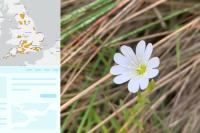

In [22]:
my_collection.save()

![deleted](https://github.com/user-attachments/assets/cc819a98-b491-4407-9cf2-99cf66339a54)

### Update theme of the Collection

Theme sets the visual style and appearance of the Collection. You can fetch and update the theme of your Collection as shown below. 

Supported values for Theme are:
* `SUMMIT`
* `OBSIDIAN`
* `RIDGELINE`
* `MESA`
* `TIDAL`
* `SLATE`

In [23]:
my_collection.get_theme()

'summit'

In [25]:
my_collection.theme(Themes.TIDAL)

True

<Item title:"Nature Collection" type:StoryMap owner:MMajumdar_geosaurus>
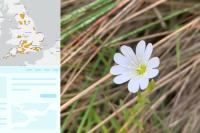

In [26]:
my_collection.save()

The theme of the Collection has been successfully updated.

![theme_change](https://github.com/user-attachments/assets/3653fa9d-fd40-4c28-bd31-1a6271fe3c5d)